In [1]:
#import datetime
#from IPython.display import clear_output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()

## **Tabla:** Compra

In [2]:
compra = pd.read_csv('Datasets/Compra.csv',delimiter = ',')
compra.head() 

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
0,1,1/30/2015,2015,1,201501,42832,13,560.51,12
1,2,1/30/2015,2015,1,201501,42833,11,497.58,7
2,3,1/30/2015,2015,1,201501,42834,1,588.50,6
3,4,1/30/2015,2015,1,201501,42835,9,567.66,14
4,5,1/30/2015,2015,1,201501,42839,14,231.31,2


In [3]:
compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdCompra       11539 non-null  int64  
 1   Fecha          11539 non-null  object 
 2   Fecha_Año      11539 non-null  int64  
 3   Fecha_Mes      11539 non-null  int64  
 4   Fecha_Periodo  11539 non-null  int64  
 5   IdProducto     11539 non-null  int64  
 6   Cantidad       11539 non-null  int64  
 7   Precio         11172 non-null  float64
 8   IdProveedor    11539 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 811.5+ KB


Reacomodo de columnas 

In [4]:
compra = compra.reindex(columns=['IdCompra', 'Fecha', 'Fecha_Año', 'Fecha_Mes', 'Fecha_Periodo', 'IdProveedor', 'IdProducto', 'Precio', 'Cantidad'])

Normalizar el tipo de dato en campos de fecha

In [5]:
compra['Fecha'] = pd.to_datetime(compra['Fecha'], format='%m/%d/%Y')
compra['Fecha_Año'] = pd.DatetimeIndex(compra['Fecha']).year
compra['Fecha_Mes'] = pd.DatetimeIndex(compra['Fecha']).month
compra['Fecha_Periodo'] = compra['Fecha_Año'] * 100 + compra['Fecha_Mes']

Revisar si existen duplicados

In [6]:
compra[compra.duplicated()]

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProveedor,IdProducto,Precio,Cantidad


Observar cantidad de datos nulos

In [7]:
def graficar_valores_nulos(df):
    """
    Esta función sirve para graficar la cantidad de valores nulos por columna
    Será utilizada más adelante para obtener información de otras tablas
    """
    valores_nulos = df.isnull().sum()
    x = valores_nulos.index.tolist()
    y = valores_nulos.values.flatten().tolist()
    plt.figure(figsize=(20,5))
    ax = sns.barplot(x, y)
    ax.grid(False)
    for i in ax.containers:
        ax.bar_label(i,)
    ax.set_title('Valores nulos por columna', fontsize=20)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


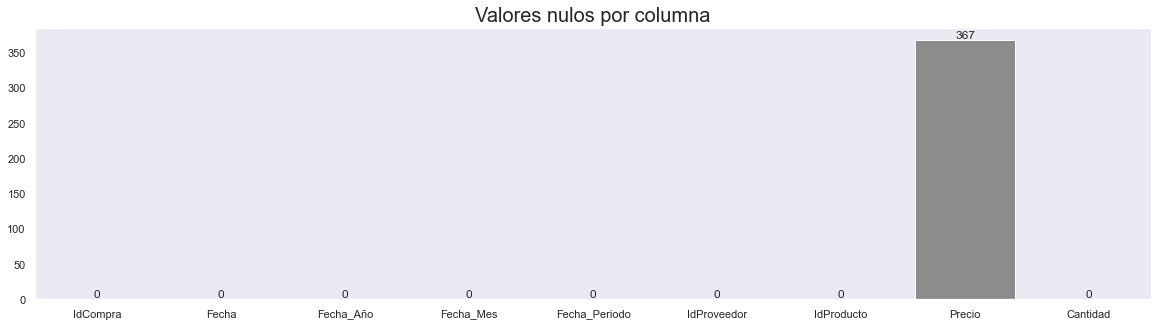

In [8]:
graficar_valores_nulos(compra)

### Valores atípicos 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


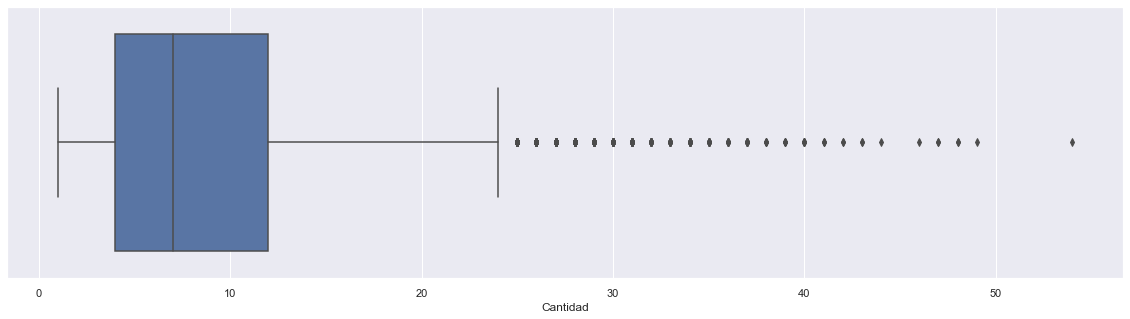

In [9]:
plt.figure(figsize=(20,5))
sns.boxplot(compra.Cantidad)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


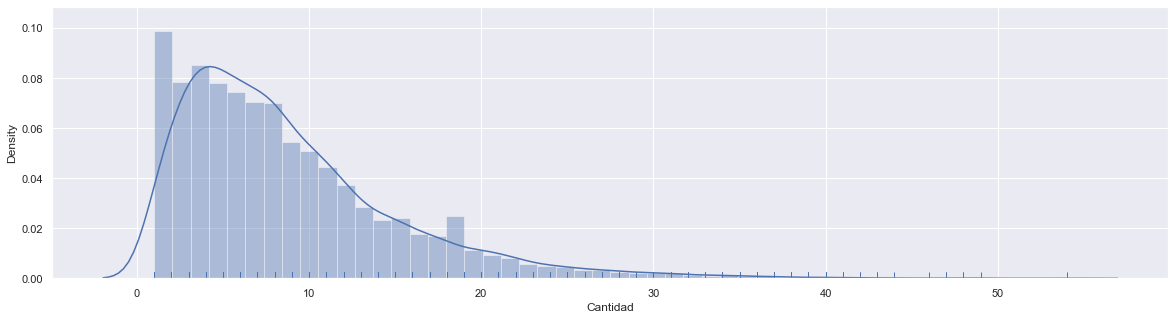

In [10]:
plt.figure(figsize=(20,5))
sns.distplot(compra.Cantidad, hist=True, kde=True, rug=True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


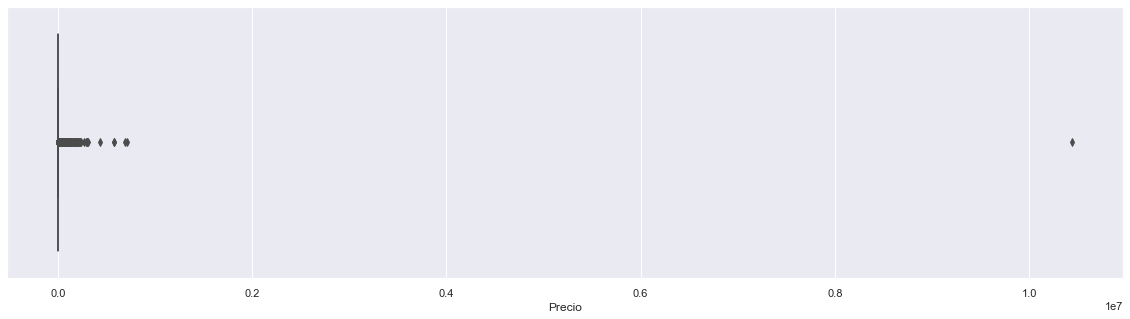

In [11]:
plt.figure(figsize=(20,5))
sns.boxplot(compra.Precio)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


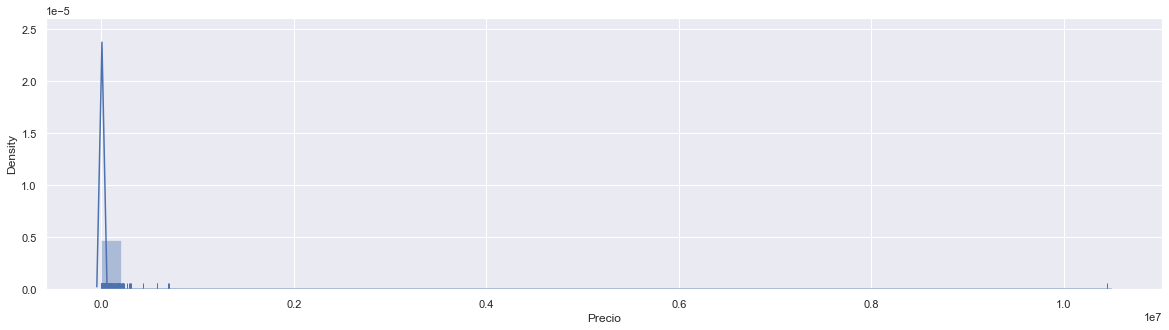

In [12]:
plt.figure(figsize=(20,5))
sns.distplot(compra.Precio, hist=True, kde=True, rug=True)
plt.show()

### Evaluación de valores atípicos

In [13]:
def outilier_id_func(df, clave, columna):
    """ 
    Esta función recibe un dataframe y retorna el valor mínimo y máximo de la columna agrupados por la clave especificada
    """
    import pandas as pd

    lista_id = []
    lista_min_columna = []
    lista_max_columna = []
    for id in df[clave].unique():
        q1 = df[df[clave] == id][columna].quantile(0.25)
        mediana = df[df[clave] == id][columna].median()
        q3 = df[df[clave] == id][columna].quantile(0.75)
        iqr = q3 - q1
        min_columna = mediana - 1.5 * iqr
        max_columna = mediana + 1.5 * iqr    
        if (min_columna < 0.001):
            min_columna = 0.001
        
        lista_id.append(id)
        lista_min_columna.append(min_columna)
        lista_max_columna.append(max_columna)

    lst = list(zip(lista_id, lista_min_columna, lista_max_columna))
    df_outliers = pd.DataFrame(lst , columns=[clave, 'Min'+columna, 'Max'+columna])
    df = pd.merge(df, df_outliers, on=clave, how='left')
    return df

In [14]:
compra = outilier_id_func(df=compra, clave='IdProducto', columna='Precio')
compra = outilier_id_func(df=compra, clave='IdProducto', columna='Cantidad')
compra.head()

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProveedor,IdProducto,Precio,Cantidad,MinPrecio,MaxPrecio,MinCantidad,MaxCantidad
0,1,2015-01-30,2015,1,201501,12,42832,560.51,13,423.27500,697.74500,0.001,20.125
1,2,2015-01-30,2015,1,201501,7,42833,497.58,11,474.70625,730.16375,0.001,18.500
2,3,2015-01-30,2015,1,201501,6,42834,588.50,1,463.36250,690.35750,0.001,18.500
3,4,2015-01-30,2015,1,201501,14,42835,567.66,9,509.01875,653.13125,0.001,18.000
4,5,2015-01-30,2015,1,201501,2,42839,231.31,14,195.90500,310.08500,0.001,22.000


In [15]:
def evaluacion_outliers(dato, columna_inicial, columna_final):
    """ 
    Esta función recibe y evalua un dato según su campo mínimo (columna_inicial) y máximo (columna_final)
    """
    calidad = 'Sin errores'
    if (str(dato) == 'nan'):
        calidad = 'Valor Nulo'
        return calidad
    if ((dato < columna_inicial) or (dato > columna_final)):
        calidad = 'Outlier'
        return calidad
    return calidad

In [16]:
compra['Calidad_Precio'] = compra.apply(lambda x: evaluacion_outliers(x['Precio'], x['MinPrecio'], x['MaxPrecio']), axis=1)
compra['Calidad_Cantidad'] = compra.apply(lambda x: evaluacion_outliers(x['Cantidad'], x['MinCantidad'], x['MaxCantidad']), axis=1)
compra.head()

,IdCompra,Fecha,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProveedor,IdProducto,Precio,Cantidad,MinPrecio,MaxPrecio,MinCantidad,MaxCantidad,Calidad_Precio,Calidad_Cantidad
0,1,2015-01-30,2015,1,201501,12,42832,560.51,13,423.27500,697.74500,0.001,20.125,Sin errores,Sin errores
1,2,2015-01-30,2015,1,201501,7,42833,497.58,11,474.70625,730.16375,0.001,18.500,Sin errores,Sin errores
2,3,2015-01-30,2015,1,201501,6,42834,588.50,1,463.36250,690.35750,0.001,18.500,Sin errores,Sin errores
3,4,2015-01-30,2015,1,201501,14,42835,567.66,9,509.01875,653.13125,0.001,18.000,Sin errores,Sin errores
4,5,2015-01-30,2015,1,201501,2,42839,231.31,14,195.90500,310.08500,0.001,22.000,Sin errores,Sin errores


In [17]:
def ploteo_calidad(df, columna):
    """
    Esta función recibe de parámetros un objeto dataframe y el nombre de la columna para la cuál se va a realizar el gráfico
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    test_per = df.groupby(columna).agg(Porcentage =(columna, lambda p: p.count() / df[columna].count() * 100)).round(2)
    sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=test_per.index, y='Porcentage', data=test_per, ci=None, palette="muted",orient='v', )
    ax.set_title(columna, fontsize=15)
    ax.set_xlabel ("Estado")
    ax.set_ylabel ("Porcentage")
    # calculate the percentages and annotate the sns barplot
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
    plt.show()

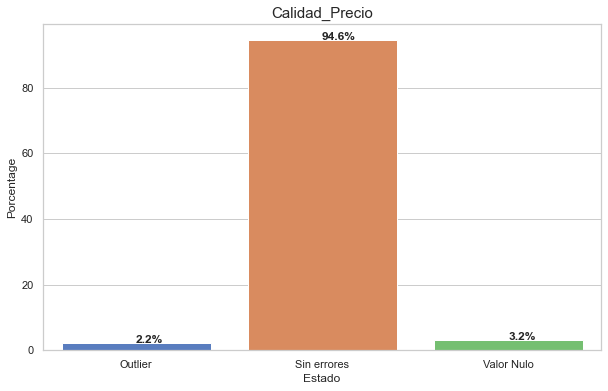

In [18]:
ploteo_calidad(compra, 'Calidad_Precio')

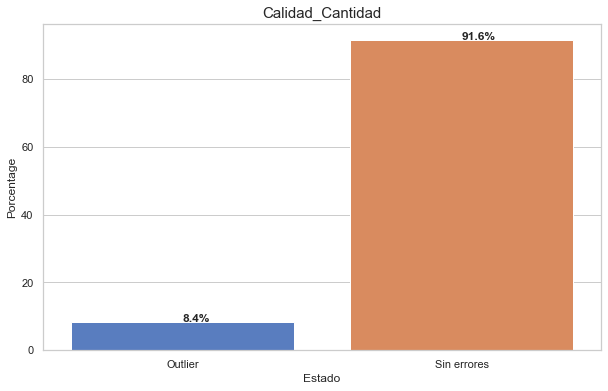

In [19]:
ploteo_calidad(compra, 'Calidad_Cantidad')

## **Tabla:** Gasto

In [20]:
gasto = pd.read_csv('Datasets/Gasto.csv',delimiter = ',')
gasto.head()

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto
0,1,18,1,2015-01-01,1164.90
1,2,18,2,2015-01-01,317.02
2,3,18,3,2015-01-01,118.89
3,4,18,4,2015-01-01,1174.23
4,5,1,1,2015-01-01,1104.51


In [21]:
gasto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdGasto      8640 non-null   int64  
 1   IdSucursal   8640 non-null   int64  
 2   IdTipoGasto  8640 non-null   int64  
 3   Fecha        8640 non-null   object 
 4   Monto        8640 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 337.6+ KB


Normalizar el tipo de dato en campos de fecha

In [22]:
gasto['Fecha']=pd.to_datetime(gasto['Fecha'], format='%Y-%m-%d')
gasto['Fecha_Año'] = pd.DatetimeIndex(gasto['Fecha']).year
gasto['Fecha_Mes'] = pd.DatetimeIndex(gasto['Fecha']).month
gasto['Fecha_Periodo'] = gasto['Fecha_Año'] * 100 + gasto['Fecha_Mes']

Revisar si existen duplicados

In [23]:
gasto[gasto.duplicated()]

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto,Fecha_Año,Fecha_Mes,Fecha_Periodo


Observar cantidad de datos nulos

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


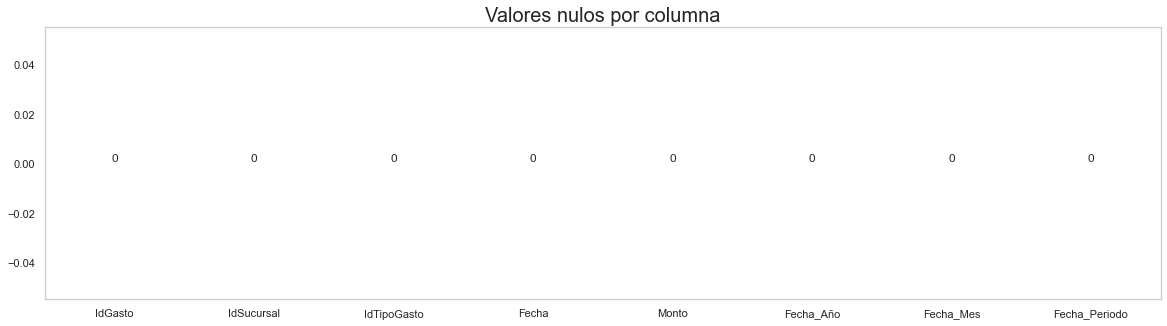

In [24]:
graficar_valores_nulos(gasto)

### Valores atípicos 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


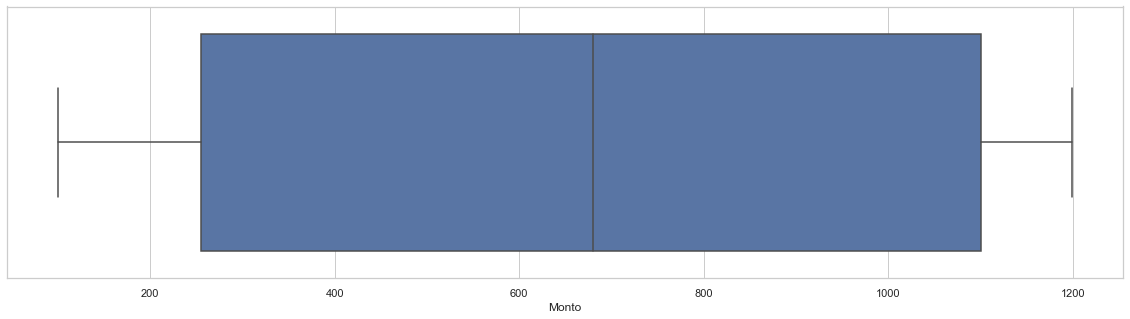

In [25]:
plt.figure(figsize=(20,5))
sns.boxplot(gasto.Monto)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


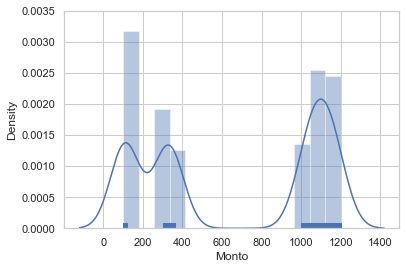

In [26]:
sns.distplot(gasto.Monto, hist=True, kde=True, rug=True)
plt.show()

In [27]:
gasto = outilier_id_func(df=gasto, clave='IdTipoGasto', columna='Monto')
gasto['Calidad_Monto'] = gasto.apply(lambda row: evaluacion_outliers(row['Monto'], row['MinMonto'], row['MaxMonto']), axis=1)
gasto.head()

,IdGasto,IdSucursal,IdTipoGasto,Fecha,Monto,Fecha_Año,Fecha_Mes,Fecha_Periodo,MinMonto,MaxMonto,Calidad_Monto
0,1,18,1,2015-01-01,1164.90,2015,1,201501,954.13625,1247.78375,Sin errores
1,2,18,2,2015-01-01,317.02,2015,1,201501,286.22500,373.91500,Sin errores
2,3,18,3,2015-01-01,118.89,2015,1,201501,95.57250,124.65750,Sin errores
3,4,18,4,2015-01-01,1174.23,2015,1,201501,948.70125,1251.79875,Sin errores
4,5,1,1,2015-01-01,1104.51,2015,1,201501,954.13625,1247.78375,Sin errores


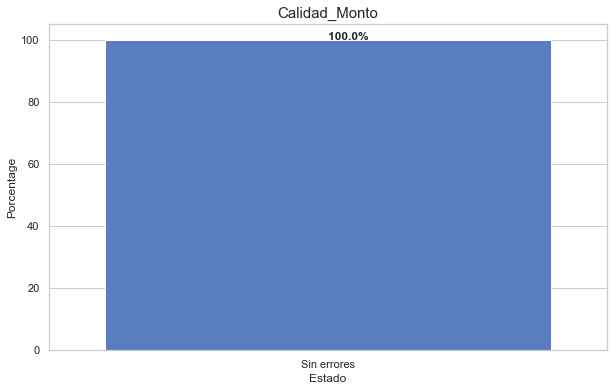

In [28]:
ploteo_calidad(gasto, 'Calidad_Monto')

## **Tabla:** Venta

In [29]:
venta = pd.read_csv('Datasets/Venta.csv',delimiter = ',')
venta.head() 

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0


In [30]:
venta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46180 entries, 0 to 46179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdVenta        46180 non-null  int64  
 1   Fecha          46180 non-null  object 
 2   Fecha_Entrega  46180 non-null  object 
 3   IdCanal        46180 non-null  int64  
 4   IdCliente      46180 non-null  int64  
 5   IdSucursal     46180 non-null  int64  
 6   IdEmpleado     46180 non-null  int64  
 7   IdProducto     46180 non-null  int64  
 8   Precio         45260 non-null  float64
 9   Cantidad       45296 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.5+ MB


Normalizar el tipo de dato en campos de fecha

In [31]:
venta['Fecha']=pd.to_datetime(venta['Fecha'], format='%Y-%m-%d')
venta['Fecha_Entrega']=pd.to_datetime(venta['Fecha_Entrega'], format='%Y-%m-%d')
venta['Fecha_Año'] = pd.DatetimeIndex(venta['Fecha']).year
venta['Fecha_Mes'] = pd.DatetimeIndex(venta['Fecha']).month
venta['Fecha_Periodo'] = venta['Fecha_Año'] * 100 + venta['Fecha_Mes']

Revisar si existen duplicados

In [32]:
venta[venta.duplicated()]

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo


Observar cantidad de datos nulos

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


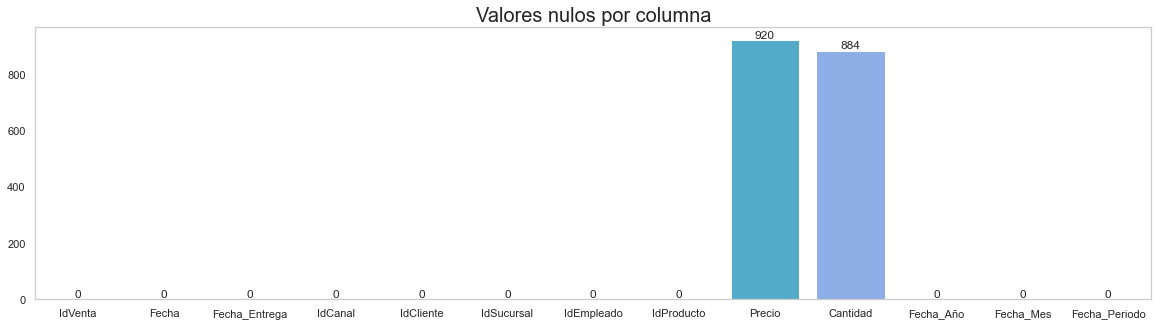

In [33]:
graficar_valores_nulos(venta)

### Valores atípicos 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


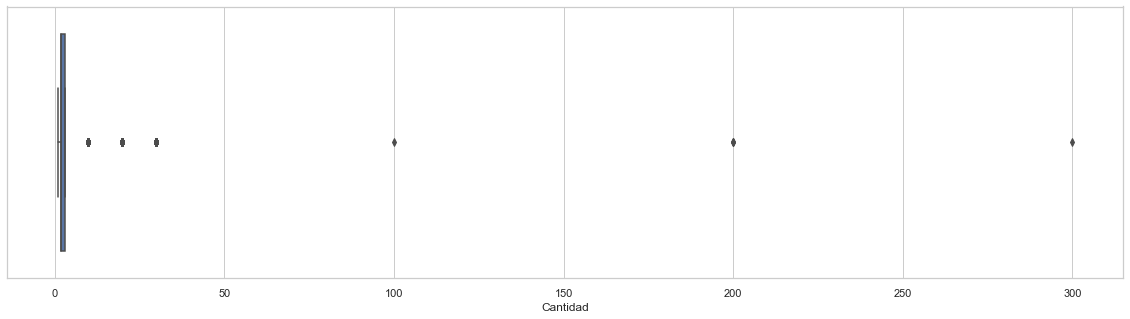

In [34]:
plt.figure(figsize=(20,5))
sns.boxplot(venta.Cantidad)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


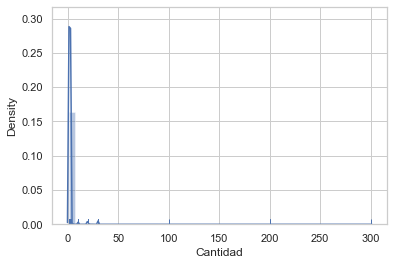

In [35]:
sns.distplot(venta.Cantidad, hist=True, kde=True, rug=True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


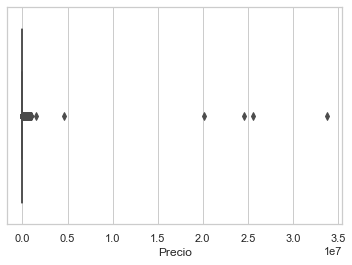

In [36]:
sns.boxplot(venta.Precio)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


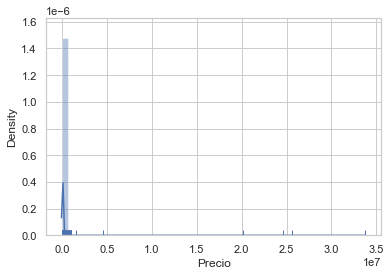

In [37]:
sns.distplot(venta.Precio, hist=True, kde=True, rug=True)
plt.show()

In [38]:
venta = outilier_id_func(df=venta, clave='IdProducto', columna='Precio')
venta = outilier_id_func(df=venta, clave='IdProducto', columna='Cantidad')
venta['Calidad_Precio'] = venta.apply(lambda x: evaluacion_outliers(x['Precio'], x['MinPrecio'], x['MaxPrecio']), axis=1)
venta['Calidad_Cantidad'] = venta.apply(lambda x: evaluacion_outliers(x['Cantidad'], x['MinCantidad'], x['MaxCantidad']), axis=1)
venta.head()

,IdVenta,Fecha,Fecha_Entrega,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad,Fecha_Año,Fecha_Mes,Fecha_Periodo,MinPrecio,MaxPrecio,MinCantidad,MaxCantidad,Calidad_Precio,Calidad_Cantidad
0,1,2018-03-09,2018-03-17,3,969,13,1674,42817,813.12,2.0,2018,3,201803,813.12,813.12,0.001,5.00,Sin errores,Sin errores
1,2,2018-12-28,2018-12-29,2,884,13,1674,42795,543.18,3.0,2018,12,201812,543.18,543.18,1.250,2.75,Sin errores,Outlier
2,3,2016-03-28,2016-03-31,2,1722,13,1674,42837,430.32,1.0,2016,3,201603,430.32,430.32,0.001,5.00,Sin errores,Sin errores
3,4,2017-10-23,2017-10-24,3,2876,13,1674,42834,818.84,2.0,2017,10,201710,818.84,818.84,0.500,3.50,Sin errores,Sin errores
4,5,2017-11-22,2017-11-25,2,678,13,1674,42825,554.18,3.0,2017,11,201711,554.18,554.18,0.001,5.00,Sin errores,Sin errores


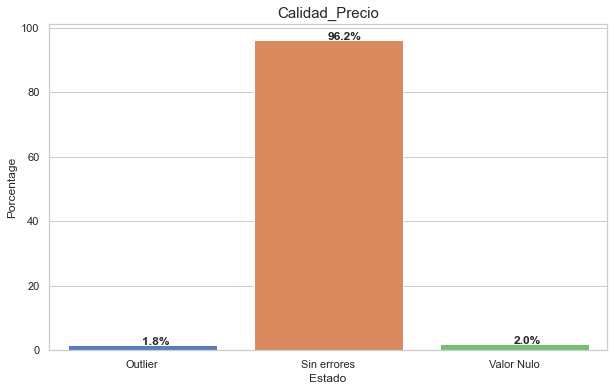

In [39]:
ploteo_calidad(venta, 'Calidad_Precio')

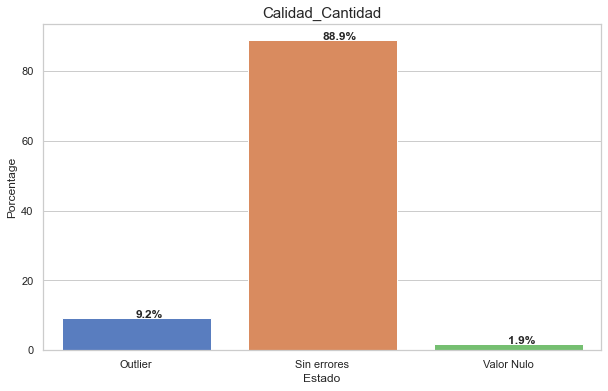

In [40]:
ploteo_calidad(venta, 'Calidad_Cantidad')

## Evolución de las ventas, compras y gastos

In [41]:
venta['Venta'] = venta['Precio'] * venta['Cantidad'] # Obtener ventas totales
compra['Compra'] = compra['Precio'] * compra['Cantidad']
venta_sin_errores = venta[(venta['Calidad_Precio'] == 'Sin errores') & (venta['Calidad_Cantidad'] == 'Sin errores')] # Crear un dataframe que no tenga outliers
compra_sin_errores = compra[(compra['Calidad_Precio'] == 'Sin errores') & (compra['Calidad_Cantidad'] == 'Sin errores')]
df_venta_sin_errores = pd.DataFrame(venta_sin_errores.groupby(['Fecha'])['Venta'].sum()) # Se agrupan por fecha 
df_compra_sin_errores = pd.DataFrame(compra_sin_errores.groupby(['Fecha'])['Compra'].sum())

Text(0, 0.5, 'Ventas')

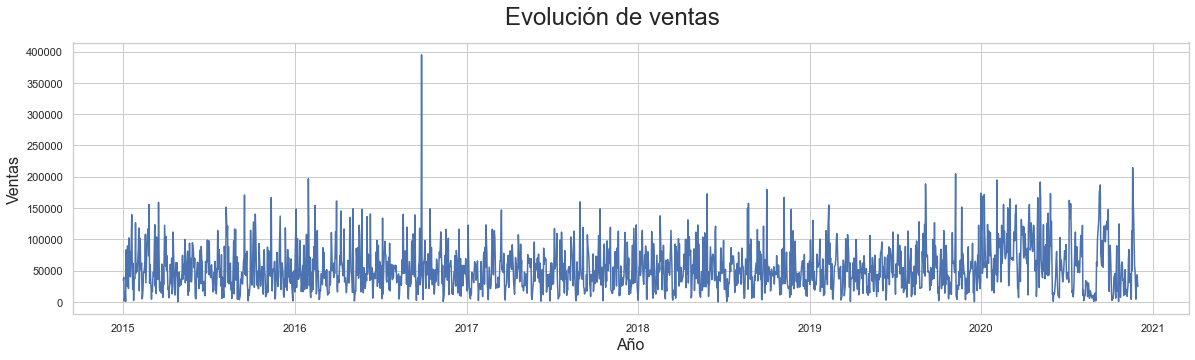

In [42]:
fig = plt.figure(figsize=(20,5))
plt.plot(df_venta_sin_errores['Venta'])
fig.suptitle('Evolución de ventas', fontsize=24)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Ventas', fontsize=16)

Text(0, 0.5, 'Compras')

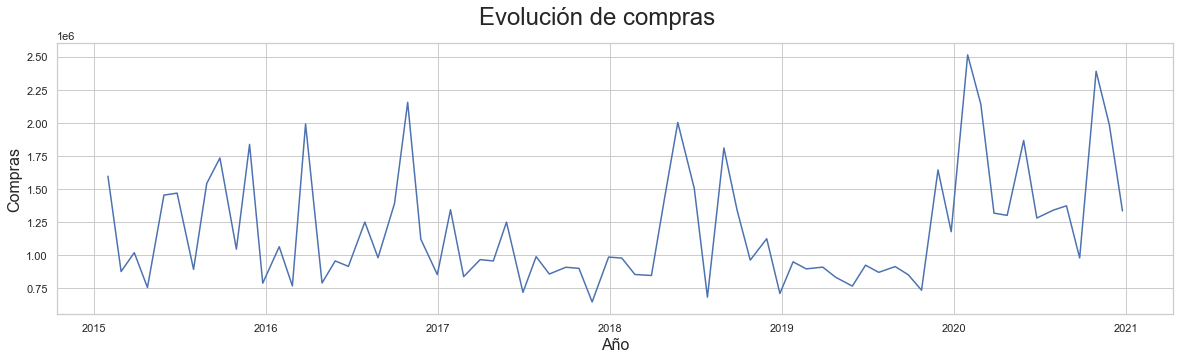

In [43]:
fig = plt.figure(figsize=(20,5))
plt.plot(df_compra_sin_errores['Compra'])
fig.suptitle('Evolución de compras', fontsize=24)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Compras', fontsize=16)

Text(0, 0.5, 'Ventas')

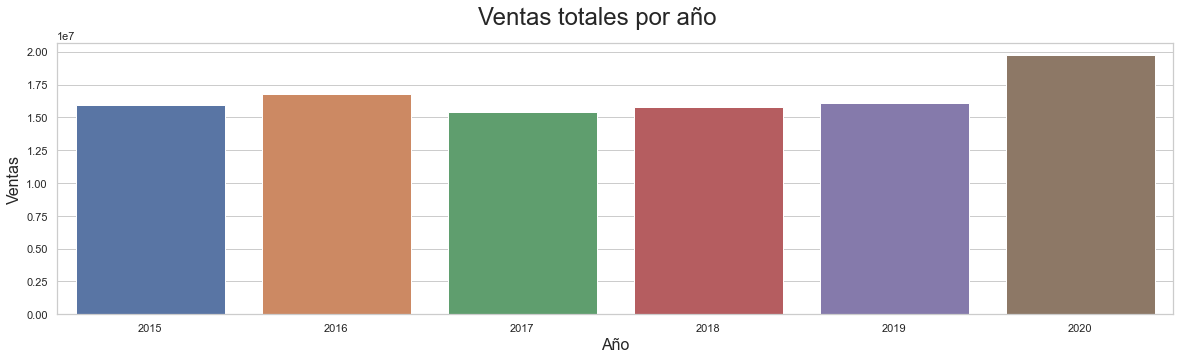

In [44]:
fig = plt.figure(figsize=(20,5))
sns.barplot(data = venta_sin_errores, x = 'Fecha_Año', y = 'Venta', estimator=sum, ci=None)
fig.suptitle('Ventas totales por año', fontsize=24)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Ventas', fontsize=16)

Text(0, 0.5, 'Ventas')

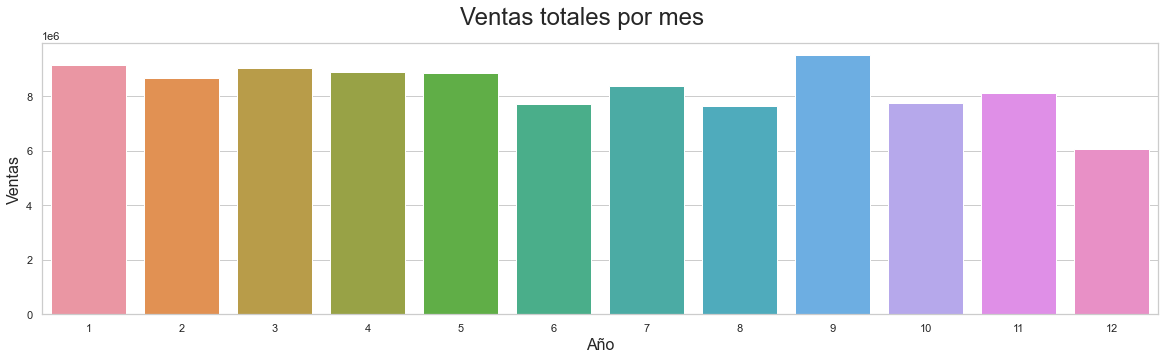

In [45]:
fig = plt.figure(figsize=(20,5))
sns.barplot(data = venta_sin_errores, x = 'Fecha_Mes', y = 'Venta', estimator=sum, ci=None)
fig.suptitle('Ventas totales por mes', fontsize=24)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Ventas', fontsize=16)

Text(0, 0.5, 'Compras')

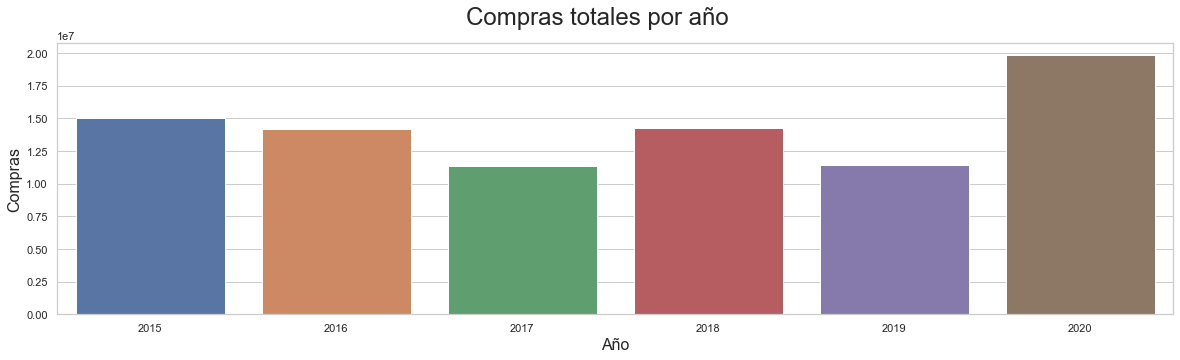

In [46]:
fig = plt.figure(figsize=(20,5))
sns.barplot(data = compra_sin_errores, x = 'Fecha_Año', y = 'Compra', estimator=sum, ci=None)
fig.suptitle('Compras totales por año', fontsize=24)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Compras', fontsize=16)

Text(0, 0.5, 'Compras')

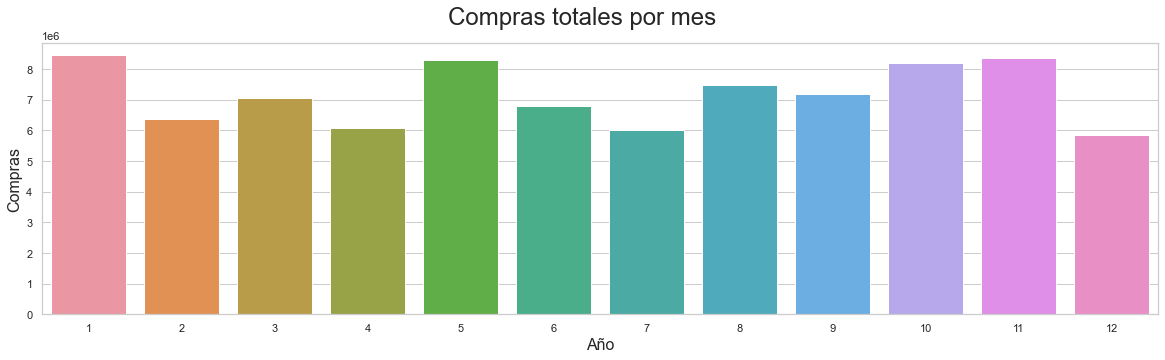

In [47]:
fig = plt.figure(figsize=(20,5))
sns.barplot(data =  compra_sin_errores, x = 'Fecha_Mes', y = 'Compra', estimator=sum, ci=None)
fig.suptitle('Compras totales por mes', fontsize=24)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Compras', fontsize=16)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidad')

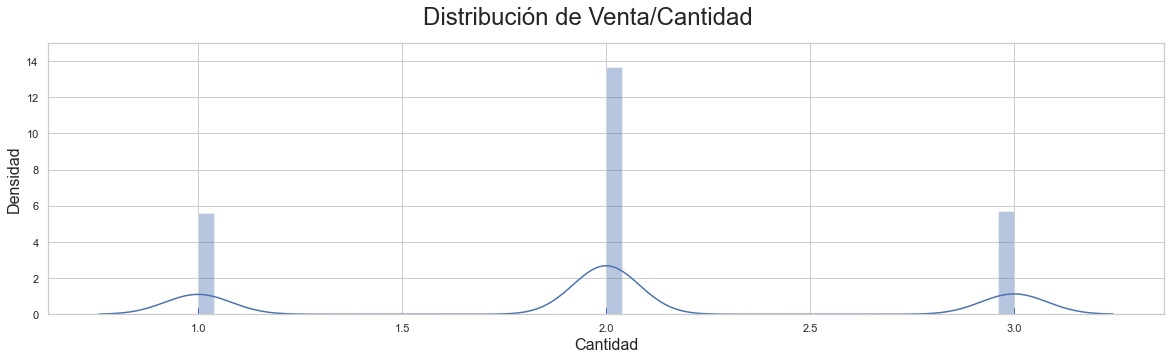

In [48]:
fig = plt.figure(figsize=(20,5))
sns.distplot(venta_sin_errores.Cantidad, hist=True, kde=True, rug=True)
fig.suptitle('Distribución de Venta/Cantidad', fontsize=24)
plt.xlabel('Cantidad', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidad')

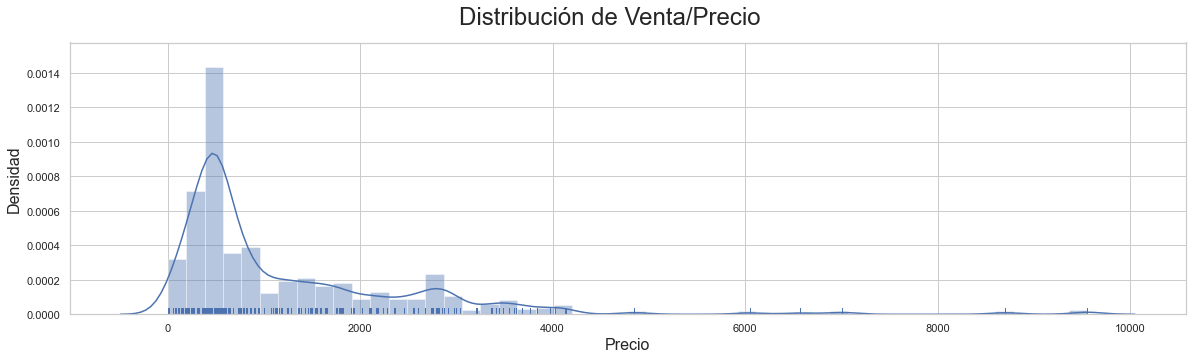

In [49]:
fig = plt.figure(figsize=(20,5))
sns.distplot(venta_sin_errores.Precio, hist=True, kde=True, rug=True)
fig.suptitle('Distribución de Venta/Precio', fontsize=24)
plt.xlabel('Precio', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidad')

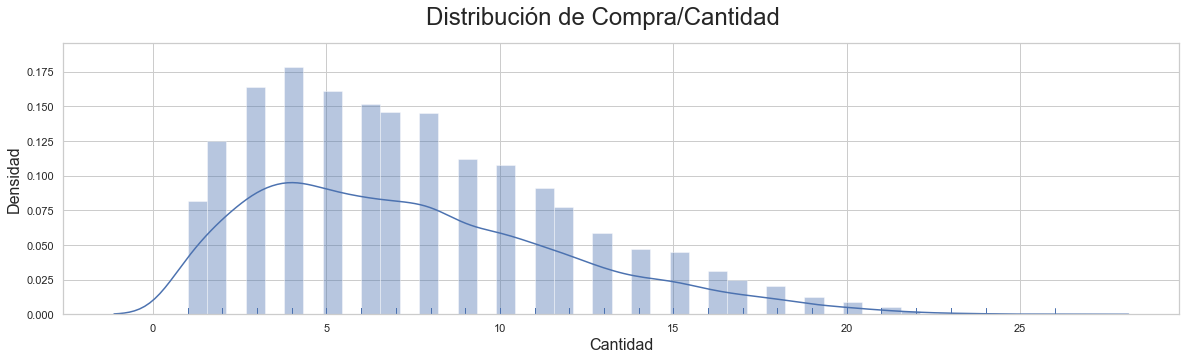

In [50]:
fig = plt.figure(figsize=(20,5))
sns.distplot(compra_sin_errores.Cantidad, hist=True, kde=True, rug=True)
fig.suptitle('Distribución de Compra/Cantidad', fontsize=24)
plt.xlabel('Cantidad', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Densidad')

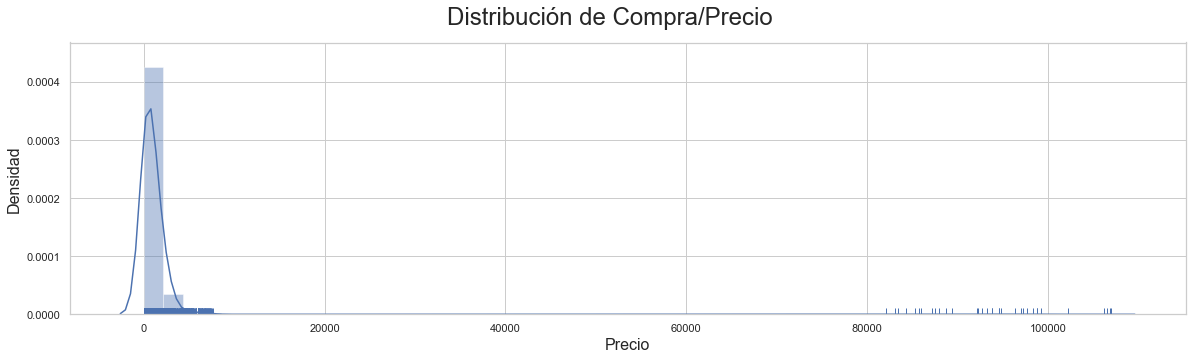

In [51]:
fig = plt.figure(figsize=(20,5))
sns.distplot(compra_sin_errores.Precio, hist=True, kde=True, rug=True)
fig.suptitle('Distribución de Compra/Precio', fontsize=24)
plt.xlabel('Precio', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

   IdProducto    Compras     Ventas     Margen    Margen%
0       42811  283825.48  711657.76  427832.28  60.117700
1       43017   41024.19  102746.00   61721.81  60.072227
2       42855  144145.18  353690.00  209544.82  59.245333
3       42754  166088.71  399712.50  233623.79  58.447957
4       43036  104816.14  249240.00  144423.86  57.945699


Text(0.5, 1.0, 'Productos con mayor margen de ganancia')

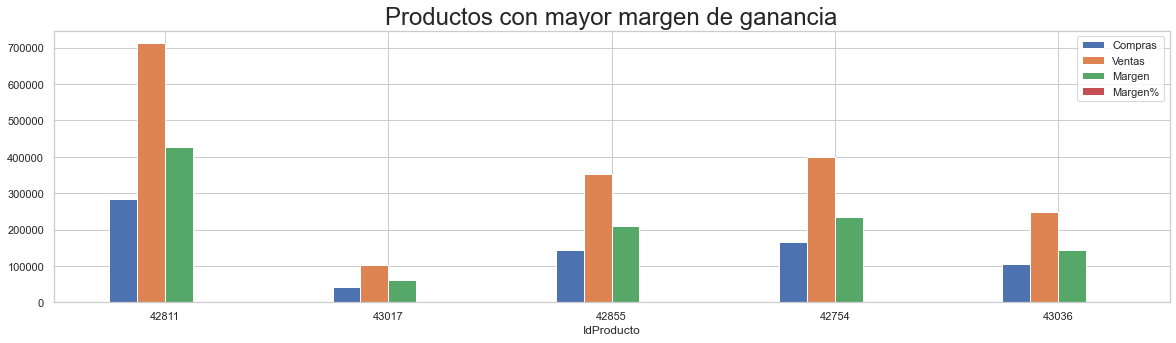

In [52]:
df_margenes = pd.DataFrame()
df_margenes['Compras'] = compra_sin_errores.groupby(['IdProducto'])['Compra'].sum()
df_margenes['Ventas'] = venta_sin_errores.groupby(['IdProducto'])['Venta'].sum()
df_margenes['Margen'] = df_margenes['Ventas'] - df_margenes['Compras']
df_margenes['Margen%'] = ((df_margenes['Ventas'] - df_margenes['Compras']) / df_margenes['Ventas']) * 100
df_margenes.sort_values(by='Margen%', ascending=False, inplace=True)
df_margenes = df_margenes[:5]
df_margenes.reset_index(inplace=True)
print(df_margenes)

df_margenes.plot.bar(rot=0, x='IdProducto', figsize=(20,5))
plt.title(label='Productos con mayor margen de ganancia', fontsize = 24)

### Guardar dataset final 

In [53]:
venta.to_csv('Datasets_Procesado/Venta.csv', index=False)
compra.to_csv('Datasets_Procesado/Compra.csv', index=False)
gasto.to_csv('Datasets_Procesado/Gasto.csv', index=False)

## **Tabla:** Cliente

In [54]:
cliente = pd.read_csv('Datasets/Clientes.csv',delimiter = ';')
cliente.head()

,ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10
0,1,Buenos Aires,HEBER JONI SANTANA,LAS HERAS Y BAT. 24 DE FEBRERO 4150 RINCON DE...,42-5161,58,LOMA VERDE,"-58,81850307","-34,30997088",NaN
1,2,Buenos Aires,ANA SAPRIZA,PUEYRREDON Y DUPUY RUTA3 KM 52.500 S/N BÂº LO...,49-7578,61,SANTA ROSA,"-58,73073751","-34,93908311",NaN
2,3,Buenos Aires,FERNANDO LUIS SARALEGUI,CALDERON DE LA BARCA 498,49-3435,15,TORRES,"-59,12794068","-34,43082199",NaN
3,4,Buenos Aires,MANUELA SARASOLA,"RUTA 36 KM 45, 500 S/N EL PELIGRO",49-2883,29,RUTA SOL,"-58,14393954","-34,92052706",NaN
4,5,Buenos Aires,MARIO RAÚL SARASUA,492 Y 186 S/N COLONIA URQUIZA,491-4608,34,JOSE MELCHOR ROMERO,"-58,89381","-34,9444471",NaN


In [55]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2384 non-null   int64  
 1   Provincia          2359 non-null   object 
 2   Nombre_y_Apellido  2365 non-null   object 
 3   Domicilio          2341 non-null   object 
 4   Telefono           2353 non-null   object 
 5   Edad               2384 non-null   int64  
 6   Localidad          2359 non-null   object 
 7   X                  2331 non-null   object 
 8   Y                  2332 non-null   object 
 9   col10              0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 186.4+ KB


Normalizar columnas y tipos de datos

In [56]:
cliente.drop(['col10'], axis=1, inplace=True) # Eliminar columna sin usar
cliente.rename(columns = {'ID':'IdCliente', 'X':'Latitud', 'Y':'Longitud'}, inplace = True) # Normalización nombres de columnas
cliente = cliente.reindex(columns=['IdCliente', 'Nombre_y_Apellido', 'Edad', 'Telefono', 'Domicilio', 'Provincia', 'Localidad', 'Latitud', 'Longitud']) # Reacomodo de columnas 
cliente[cliente['Latitud'] == '!'] = 0 # Imputar valor erróneo - Error: could not convert string to float: '!'
cliente['Latitud'] = cliente['Latitud'].str.replace(",",".").astype("float") # Reemplazo de comas y el tipo de dato
cliente['Longitud'] = cliente['Longitud'].str.replace(",",".").astype("float")
cliente['Nombre_y_Apellido'] = cliente['Nombre_y_Apellido'].str.title() # De mayúsculas a título 
cliente['Domicilio'] = cliente['Domicilio'].str.title()
cliente['Localidad'] = cliente['Localidad'].str.title()
cliente.head()

,IdCliente,Nombre_y_Apellido,Edad,Telefono,Domicilio,Provincia,Localidad,Latitud,Longitud
0,1,Heber Joni Santana,58,42-5161,Las Heras Y Bat. 24 De Febrero 4150 Rincon De...,Buenos Aires,Loma Verde,-58.818503,-34.309971
1,2,Ana Sapriza,61,49-7578,Pueyrredon Y Dupuy Ruta3 Km 52.500 S/N Bâº Lo...,Buenos Aires,Santa Rosa,-58.730738,-34.939083
2,3,Fernando Luis Saralegui,15,49-3435,Calderon De La Barca 498,Buenos Aires,Torres,-59.127941,-34.430822
3,4,Manuela Sarasola,29,49-2883,"Ruta 36 Km 45, 500 S/N El Peligro",Buenos Aires,Ruta Sol,-58.143940,-34.920527
4,5,Mario Raúl Sarasua,34,491-4608,492 Y 186 S/N Colonia Urquiza,Buenos Aires,Jose Melchor Romero,-58.893810,-34.944447


Revisar si existen duplicados

In [57]:
cliente[cliente.duplicated()]

,IdCliente,Nombre_y_Apellido,Edad,Telefono,Domicilio,Provincia,Localidad,Latitud,Longitud


Observar cantidad de datos nulos

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


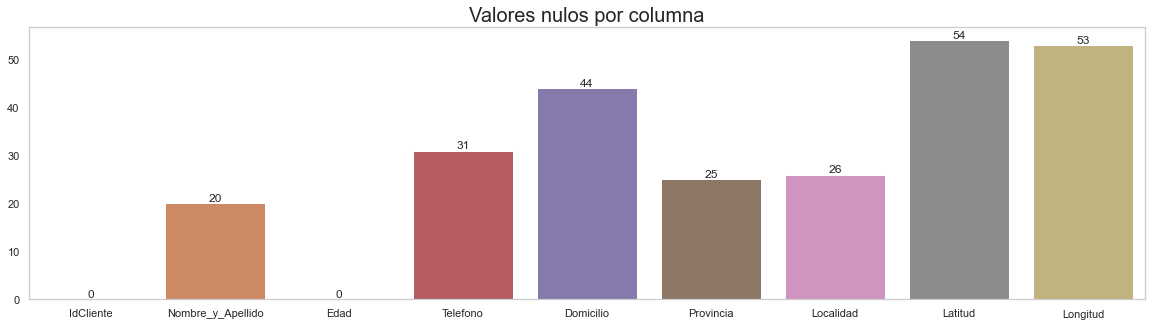

In [58]:
graficar_valores_nulos(cliente)

### Valores atípicos 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Edad'>

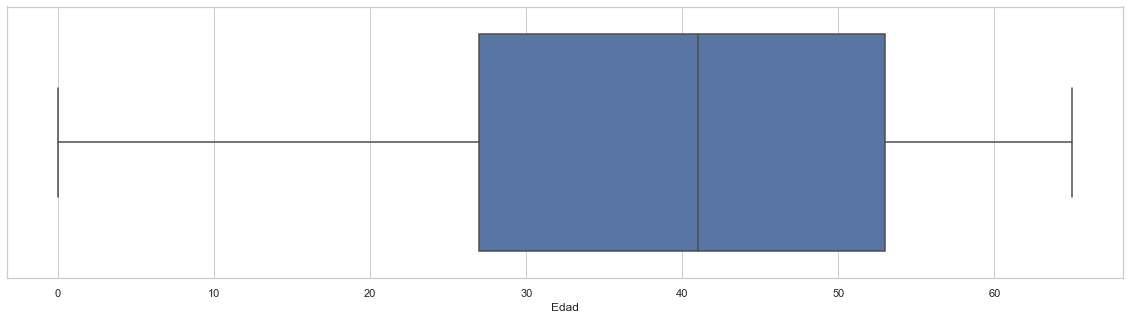

In [59]:
plt.figure(figsize=(20,5))
sns.boxplot(cliente.Edad)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Edad', ylabel='Density'>

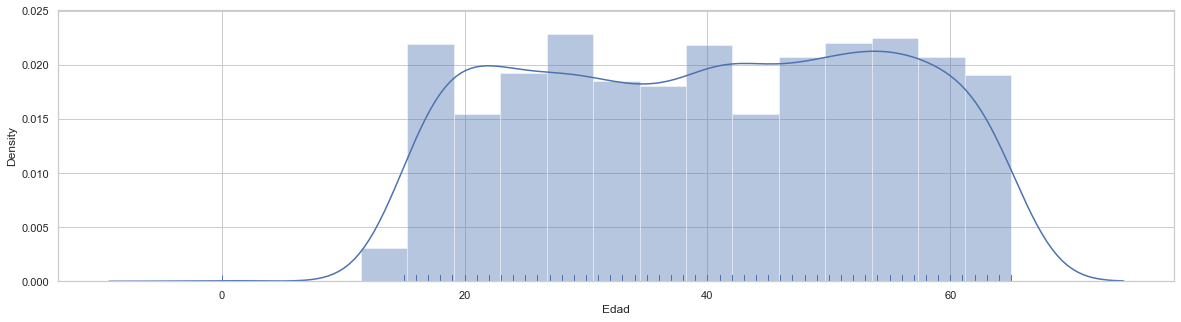

In [60]:
plt.figure(figsize=(20,5))
sns.distplot(cliente.Edad, hist=True, kde=True, rug=True)

<AxesSubplot:xlabel='Longitud'>

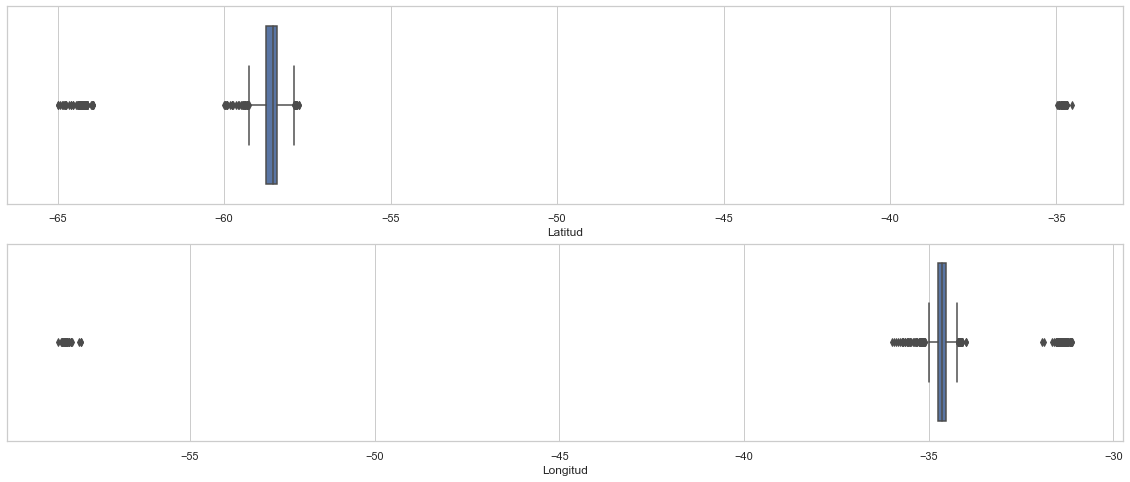

In [61]:
fig, axes = plt.subplots(2,1, figsize=(20,8))
sns.boxplot(x=cliente['Latitud'], ax=axes[0])
sns.boxplot(x=cliente['Longitud'], ax=axes[1])

In [62]:
fig = px.scatter_mapbox(cliente, lat="Latitud", lon="Longitud", hover_name="Provincia", hover_data=["Provincia", "Localidad"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Todas las latitudes y longitudes de los clientes deben pertenecer a Argentina, por lo que los valores atípicos que se observan fueron porque algunos valores son positivos y todos los campos deberían ser negativos, y en otros casos los campos de latitud y longitud están intercambiados

In [63]:
cliente['Latitud'] = cliente['Latitud'].apply(lambda x: x if x < 0 else x * -1) # Convertir campos a negativo 
cliente['Longitud'] = cliente['Longitud'].apply(lambda x: x if x < 0 else x * -1)

cliente['Latitud_aux'] = cliente['Latitud'] # Se requiere una tabla auxiliar para el intercambio de campos 
cliente['Latitud'] = cliente.apply(lambda row: row['Latitud'] if row['Latitud_aux'] > -55 else row['Longitud'], axis=1)  
cliente['Longitud'] = cliente.apply(lambda row: row['Longitud'] if row['Latitud_aux'] > -55 else row['Latitud_aux'], axis=1)
cliente.drop(columns=['Latitud_aux'],axis=1 ,inplace=True)

Graficar nuevamente

<AxesSubplot:xlabel='Longitud'>

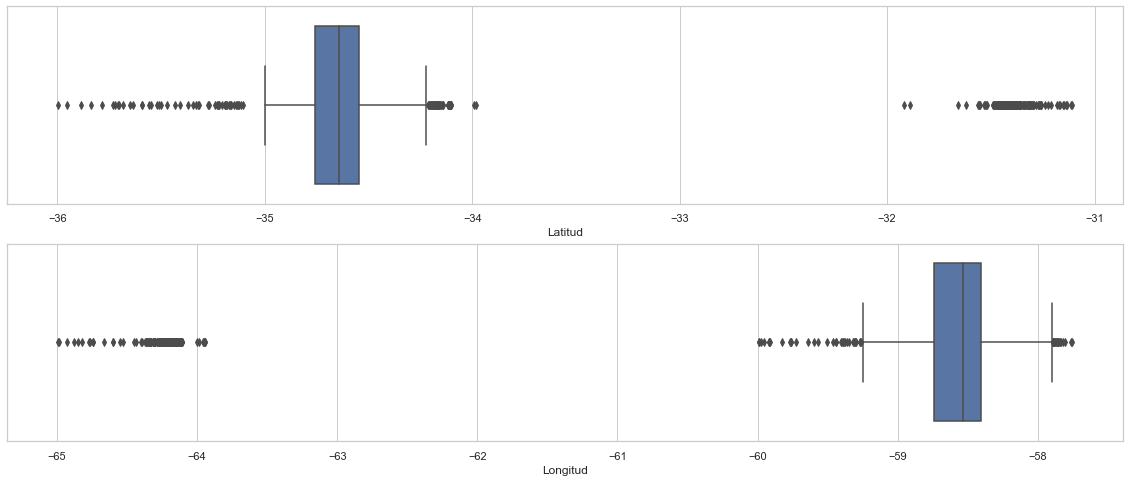

In [64]:
fig, axes = plt.subplots(2,1, figsize=(20,8))
sns.boxplot(x=cliente['Latitud'], ax=axes[0])
sns.boxplot(x=cliente['Longitud'], ax=axes[1])

In [65]:
fig = px.scatter_mapbox(cliente, lat="Latitud", lon="Longitud", hover_name="Provincia", hover_data=["Provincia", "Localidad"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Normalización de datos

In [66]:
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ 
        Esta función calcula la distancia de Levenshtein entre dos cadenas de caracteres
        Si ratio_calc = True, la función computa la distancia de Levenshtein o similaridad entre dos cadenas de caracteres
        Para todas las 'i' y 'j', distance[i,j] contendrá la distancia de Levenshtein entre los primeros 'i' caracteres de 's'
        y el primer 'j' de 't'
        Fuente: https://www.datacamp.com/community/tutorials/fuzzy-string-python
    """
    import numpy as np
    # Initialize matrix of zeros
    s = str(s)
    t = str(t)
    rows = len(s)+1
    cols = len(t)+1
    if (rows == 1 or cols == 1):
        return 0
    col = 0
    row = 0
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [67]:
def normalizacion_geografica(df_normalizar, campo_localidad, campo_provincia):
    """
    Esta funcion te permite normalizar los campos de Localidad y Provincia
    """
    import pandas as pd
    from IPython.display import clear_output
    
    df_localidad = pd.read_csv('Datasets/Localidades.csv', sep=",")
    
    lista_localidad_original = []
    lista_provincia_original = []
    lista_localidad = []
    lista_localidad_ind = []
    lista_provincia = []
    lista_provincia_ind = []
    lista_localidad_id = []

    total = df_normalizar.shape[0]
    j = 0

    while ((j < total)):
        localidad_ind = 0
        localidad = ''
        provincia_ind = 0
        provincia = ''
        ind = 0
        id_localidad = 0
        l = 0
        for prov in df_localidad.provincia_nombre.unique():
            ind = levenshtein_ratio_and_distance(str(df_normalizar.iloc[j][campo_provincia]).lower(),str(prov).lower(), ratio_calc = True)
            if (ind > provincia_ind):
                provincia_ind = ind
                provincia = str(prov)

        df_loc = df_localidad[df_localidad['provincia_nombre'] == provincia][['id','localidad_censal_nombre','municipio_nombre','nombre']]
        total_l = df_loc.id.count()
        l = 0
        encontrado = False
        while ((l < total_l) & (not encontrado)):
            ind = levenshtein_ratio_and_distance(str(df_normalizar.iloc[j][campo_localidad]).lower(),str(df_loc.iloc[l]['localidad_censal_nombre']).lower(), ratio_calc = True)
            if (ind > localidad_ind):
                localidad_ind = ind
                localidad = str(df_loc.iloc[l]['localidad_censal_nombre'])
                id_localidad = df_loc.iloc[l]['id']

            ind = levenshtein_ratio_and_distance(str(df_normalizar.iloc[j][campo_localidad]).lower(),str(df_loc.iloc[l]['municipio_nombre']).lower(), ratio_calc = True)
            if (ind > localidad_ind):
                localidad_ind = ind
                localidad = str(df_loc.iloc[l]['municipio_nombre'])
                id_localidad = df_loc.iloc[l]['id']

            ind = levenshtein_ratio_and_distance(str(df_normalizar.iloc[j][campo_localidad]).lower(),str(df_loc.iloc[l]['nombre']).lower(), ratio_calc = True)
            if (ind > localidad_ind):
                localidad_ind = ind
                localidad = str(df_loc.iloc[l]['nombre'])
                id_localidad = df_loc.iloc[l]['id']

            if (localidad_ind == 1):
                encontrado = True

            l = l + 1
        del(df_loc)

        lista_localidad_original.append(df_normalizar.iloc[j][campo_localidad])
        lista_provincia_original.append(df_normalizar.iloc[j][campo_provincia])
        lista_localidad.append(localidad)
        lista_localidad_ind.append(localidad_ind)
        lista_provincia.append(provincia)
        lista_provincia_ind.append(provincia_ind)
        lista_localidad_id.append(id_localidad)
        j = j + 1

        clear_output(wait=True)
        print('Completado: ' + str(round(j / total * 100, 2)) + '%')

    lst = list(zip(lista_localidad_original, lista_provincia_original, lista_localidad, lista_localidad_ind, lista_provincia, lista_provincia_ind, lista_localidad_id))
    df_normalizar = pd.DataFrame(lst , columns = [campo_localidad,campo_provincia,'Localidad_Normalizada','Localidad_Ind','Provincia_Normalizada','Provincia_Ind', 'id'])
    
    return df_normalizar

In [68]:
df_normalizar = cliente[['Localidad', 'Provincia']].drop_duplicates()
df_normalizar = normalizacion_geografica(df_normalizar, 'Localidad', 'Provincia')
df_normalizar.head()

Completado: 100.0%


,Localidad,Provincia,Localidad_Normalizada,Localidad_Ind,Provincia_Normalizada,Provincia_Ind,id
0,Loma Verde,Buenos Aires,LOMA VERDE,1.0,Buenos Aires,1.0,6252010005
1,Santa Rosa,Buenos Aires,Santa Rosa,1.0,Buenos Aires,1.0,6134060000
2,Torres,Buenos Aires,Torres,1.0,Buenos Aires,1.0,6497090000
3,Ruta Sol,Buenos Aires,Ruta Sol,1.0,Buenos Aires,1.0,6441050000
4,Jose Melchor Romero,Buenos Aires,JOSE MELCHOR ROMERO,1.0,Buenos Aires,1.0,6441030013


In [69]:
cliente = pd.merge(cliente, df_normalizar, on=['Localidad', 'Provincia'], how='left')
cliente.head()

,IdCliente,Nombre_y_Apellido,Edad,Telefono,Domicilio,Provincia,Localidad,Latitud,Longitud,Localidad_Normalizada,Localidad_Ind,Provincia_Normalizada,Provincia_Ind,id
0,1,Heber Joni Santana,58,42-5161,Las Heras Y Bat. 24 De Febrero 4150 Rincon De...,Buenos Aires,Loma Verde,-34.309971,-58.818503,LOMA VERDE,1.0,Buenos Aires,1.0,6252010005
1,2,Ana Sapriza,61,49-7578,Pueyrredon Y Dupuy Ruta3 Km 52.500 S/N Bâº Lo...,Buenos Aires,Santa Rosa,-34.939083,-58.730738,Santa Rosa,1.0,Buenos Aires,1.0,6134060000
2,3,Fernando Luis Saralegui,15,49-3435,Calderon De La Barca 498,Buenos Aires,Torres,-34.430822,-59.127941,Torres,1.0,Buenos Aires,1.0,6497090000
3,4,Manuela Sarasola,29,49-2883,"Ruta 36 Km 45, 500 S/N El Peligro",Buenos Aires,Ruta Sol,-34.920527,-58.143940,Ruta Sol,1.0,Buenos Aires,1.0,6441050000
4,5,Mario Raúl Sarasua,34,491-4608,492 Y 186 S/N Colonia Urquiza,Buenos Aires,Jose Melchor Romero,-34.944447,-58.893810,JOSE MELCHOR ROMERO,1.0,Buenos Aires,1.0,6441030013


## **Tabla:** Proveedor

In [70]:
proveedor = pd.read_csv('Datasets/Proveedores.csv',delimiter = ',',encoding = "latin-1")
proveedor

,IDProveedor,Nombre,Address,City,State,Country,departamen
0,1,NaN,BEREGUESTEIN 36,AVELLANEDA,BUENOS AIRES,ARGENTINA,AVELLANEDA
1,2,San Cirano,ALBERTI 965,CORONEL BRANDSEN,BUENOS AIRES,ARGENTINA,BRANDSEN
2,3,Bell S.A.,MORENO 331,CAMPANA,BUENOS AIRES,ARGENTINA,CAMPANA
3,4,Rivero Insumos,PTE. PERON 3872,VALENTIN ALSINA,BUENOS AIRES,ARGENTINA,LANUS
4,5,Laprida Computacion,AVDA. PEDRO PEREYRA 1339,LAPRIDA,BUENOS AIRES,ARGENTINA,LAPRIDA
5,6,Importadora Mann Kloss,LOPE DE VEGA 2102,BOCA DE ATENCION MONTE CASTRO,CABA,ARGENTINA,COMUNA 10
6,7,Fletes y Logistica,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL
7,8,NaN,SANTA ROSA 1564,CORDOBA,CORDOBA,ARGENTINA,CAPITAL
8,9,Via Chile Containers,JUAN B. JUSTO 415,MENDOZA,MENDOZA,ARGENTINA,CAPITAL
9,10,Full Toner,CORDOBA 246,MENDOZA,MENDOZA,ARGENTINA,CAPITAL


In [71]:
proveedor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDProveedor  14 non-null     int64 
 1   Nombre       12 non-null     object
 2   Address      14 non-null     object
 3   City         14 non-null     object
 4   State        14 non-null     object
 5   Country      14 non-null     object
 6   departamen   14 non-null     object
dtypes: int64(1), object(6)
memory usage: 912.0+ bytes


Normalizar columnas y tipos de datos

In [72]:
proveedor.drop(7, axis=0, inplace=True) # Eliminar entrada duplicada que no tiene nombre
proveedor.columns = ['IdProveedor', 'Proveedor', 'Domicilio', 'Ciudad', 'Provincia', 'Pais', 'Departamento'] # Reacomodo de columnas
proveedor['Domicilio'] = proveedor['Domicilio'].str.title() # Convertir cadenas de texto mayúsculas a tipo título 
proveedor['Ciudad'] = proveedor['Ciudad'].str.title()
proveedor['Provincia'] = proveedor['Provincia'].str.title()
proveedor['Pais'] = proveedor['Pais'].str.title()
proveedor['Departamento'] = proveedor['Departamento'].str.title()
proveedor.head()

,IdProveedor,Proveedor,Domicilio,Ciudad,Provincia,Pais,Departamento
0,1,NaN,Bereguestein 36,Avellaneda,Buenos Aires,Argentina,Avellaneda
1,2,San Cirano,Alberti 965,Coronel Brandsen,Buenos Aires,Argentina,Brandsen
2,3,Bell S.A.,Moreno 331,Campana,Buenos Aires,Argentina,Campana
3,4,Rivero Insumos,Pte. Peron 3872,Valentin Alsina,Buenos Aires,Argentina,Lanus
4,5,Laprida Computacion,Avda. Pedro Pereyra 1339,Laprida,Buenos Aires,Argentina,Laprida


Revisar si existen duplicados

In [73]:
proveedor[proveedor.duplicated()]

,IdProveedor,Proveedor,Domicilio,Ciudad,Provincia,Pais,Departamento


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



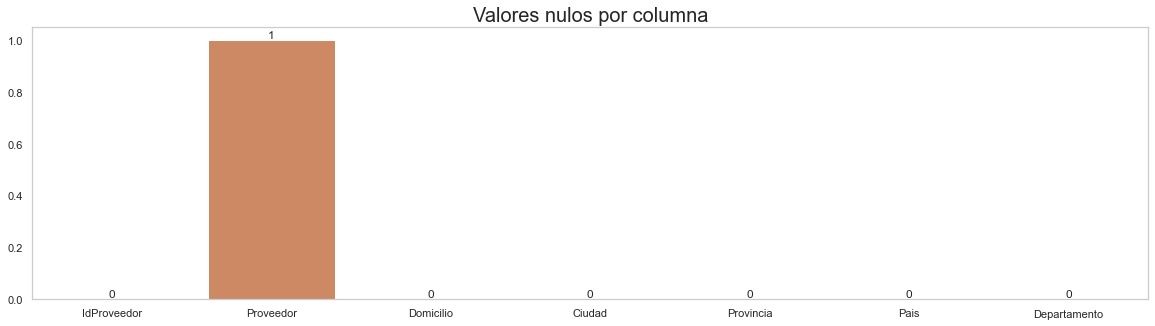

In [74]:
graficar_valores_nulos(proveedor)

In [75]:
df_normalizar = proveedor[['Ciudad','Departamento']].drop_duplicates()
df_normalizar = normalizacion_geografica(df_normalizar, 'Departamento', 'Ciudad')
df_normalizar.head()

Completado: 100.0%


,Departamento,Ciudad,Localidad_Normalizada,Localidad_Ind,Provincia_Normalizada,Provincia_Ind,id
0,Avellaneda,Avellaneda,VILLA NUEVA,0.666667,Mendoza,0.470588,50028020014
1,Brandsen,Coronel Brandsen,Bonpland,0.500000,Corrientes,0.461538,18119010000
2,Campana,Campana,Amanao,0.769231,Catamarca,0.625000,10021010000
3,Lanus,Valentin Alsina,VILLA NACUSI,0.588235,San Juan,0.434783,70070050002
4,Laprida,Laprida,La Rioja,0.666667,La Rioja,0.666667,46014010000


In [76]:
proveedor = pd.merge(proveedor, df_normalizar, on=['Departamento', 'Ciudad'], how='left')
proveedor.head()

,IdProveedor,Proveedor,Domicilio,Ciudad,Provincia,Pais,Departamento,Localidad_Normalizada,Localidad_Ind,Provincia_Normalizada,Provincia_Ind,id
0,1,NaN,Bereguestein 36,Avellaneda,Buenos Aires,Argentina,Avellaneda,VILLA NUEVA,0.666667,Mendoza,0.470588,50028020014
1,2,San Cirano,Alberti 965,Coronel Brandsen,Buenos Aires,Argentina,Brandsen,Bonpland,0.500000,Corrientes,0.461538,18119010000
2,3,Bell S.A.,Moreno 331,Campana,Buenos Aires,Argentina,Campana,Amanao,0.769231,Catamarca,0.625000,10021010000
3,4,Rivero Insumos,Pte. Peron 3872,Valentin Alsina,Buenos Aires,Argentina,Lanus,VILLA NACUSI,0.588235,San Juan,0.434783,70070050002
4,5,Laprida Computacion,Avda. Pedro Pereyra 1339,Laprida,Buenos Aires,Argentina,Laprida,La Rioja,0.666667,La Rioja,0.666667,46014010000


## **Tabla:** Localidad

In [77]:
localidad = pd.read_csv('Datasets/Localidades.csv',delimiter = ',')
localidad.head()

,categoria,centroide_lat,centroide_lon,departamento_id,departamento_nombre,fuente,id,localidad_censal_id,localidad_censal_nombre,municipio_id,municipio_nombre,nombre,provincia_id,provincia_nombre
0,Localidad simple,-35.033073,-60.280620,6021.0,Alberti,INDEC,6021010000,6021010,Alberti,60021.0,Alberti,ALBERTI,6,Buenos Aires
1,Localidad simple,-34.868119,-60.393971,6021.0,Alberti,INDEC,6021020000,6021020,Coronel Seguí,60021.0,Alberti,CORONEL SEGUI,6,Buenos Aires
2,Componente de localidad compuesta,-35.068014,-60.402597,6021.0,Alberti,INDEC,6021030000,6021030,Mechita,60021.0,Alberti,MECHITA,6,Buenos Aires
3,Localidad simple,-35.124382,-60.220061,6021.0,Alberti,INDEC,6021040000,6021040,Pla,60021.0,Alberti,PLA,6,Buenos Aires
4,Localidad simple,-35.109618,-60.070551,6021.0,Alberti,INDEC,6021050000,6021050,Villa Grisolía,60021.0,Alberti,VILLA GRISOLIA,6,Buenos Aires


In [78]:
localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   categoria                4142 non-null   object 
 1   centroide_lat            4142 non-null   float64
 2   centroide_lon            4142 non-null   float64
 3   departamento_id          4141 non-null   float64
 4   departamento_nombre      4141 non-null   object 
 5   fuente                   4142 non-null   object 
 6   id                       4142 non-null   int64  
 7   localidad_censal_id      4142 non-null   int64  
 8   localidad_censal_nombre  4142 non-null   object 
 9   municipio_id             3599 non-null   float64
 10  municipio_nombre         3648 non-null   object 
 11  nombre                   4142 non-null   object 
 12  provincia_id             4142 non-null   int64  
 13  provincia_nombre         4142 non-null   object 
dtypes: float64(4), int64(3),

Normalizar columnas y tipos de datos

In [79]:
localidad.columns = ['Categoria', 'Latitud', 'Longitud', 'IdDepartamento', 'Departamento', 'Fuente', 'IdLocalidad', 'IdLocalidadCensal', 'LocalidadCensal', 'IdMunicipio', 'Municipio', 'Localidad', 'IdProvincia', 'Provincia'] # Renombrar nombres de columnas 
localidad = localidad.reindex(columns=['IdLocalidad', 'Localidad', 'IdMunicipio', 'Municipio', 'IdDepartamento', 'Departamento', 'IdProvincia', 'Provincia', 'Fuente', 'IdLocalidadCensal', 'LocalidadCensal', 'Categoria', 'Latitud', 'Longitud']) # Reacomodar los índices de la tabla
localidad['Localidad'] = localidad['Localidad'].str.title() # Convertir cadenas de texto mayúsculas a tipo título 
localidad.head() 

,IdLocalidad,Localidad,IdMunicipio,Municipio,IdDepartamento,Departamento,IdProvincia,Provincia,Fuente,IdLocalidadCensal,LocalidadCensal,Categoria,Latitud,Longitud
0,6021010000,Alberti,60021.0,Alberti,6021.0,Alberti,6,Buenos Aires,INDEC,6021010,Alberti,Localidad simple,-35.033073,-60.280620
1,6021020000,Coronel Segui,60021.0,Alberti,6021.0,Alberti,6,Buenos Aires,INDEC,6021020,Coronel Seguí,Localidad simple,-34.868119,-60.393971
2,6021030000,Mechita,60021.0,Alberti,6021.0,Alberti,6,Buenos Aires,INDEC,6021030,Mechita,Componente de localidad compuesta,-35.068014,-60.402597
3,6021040000,Pla,60021.0,Alberti,6021.0,Alberti,6,Buenos Aires,INDEC,6021040,Pla,Localidad simple,-35.124382,-60.220061
4,6021050000,Villa Grisolia,60021.0,Alberti,6021.0,Alberti,6,Buenos Aires,INDEC,6021050,Villa Grisolía,Localidad simple,-35.109618,-60.070551


Revisar si existen duplicados

In [80]:
localidad[localidad.duplicated()]

,IdLocalidad,Localidad,IdMunicipio,Municipio,IdDepartamento,Departamento,IdProvincia,Provincia,Fuente,IdLocalidadCensal,LocalidadCensal,Categoria,Latitud,Longitud


Observar cantidad de datos nulos

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



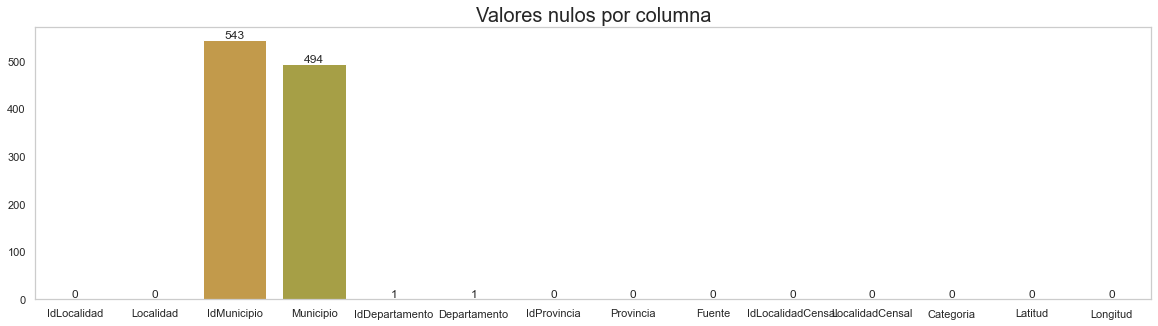

In [81]:
graficar_valores_nulos(localidad)

### Valores atípicos 

<AxesSubplot:xlabel='Longitud'>

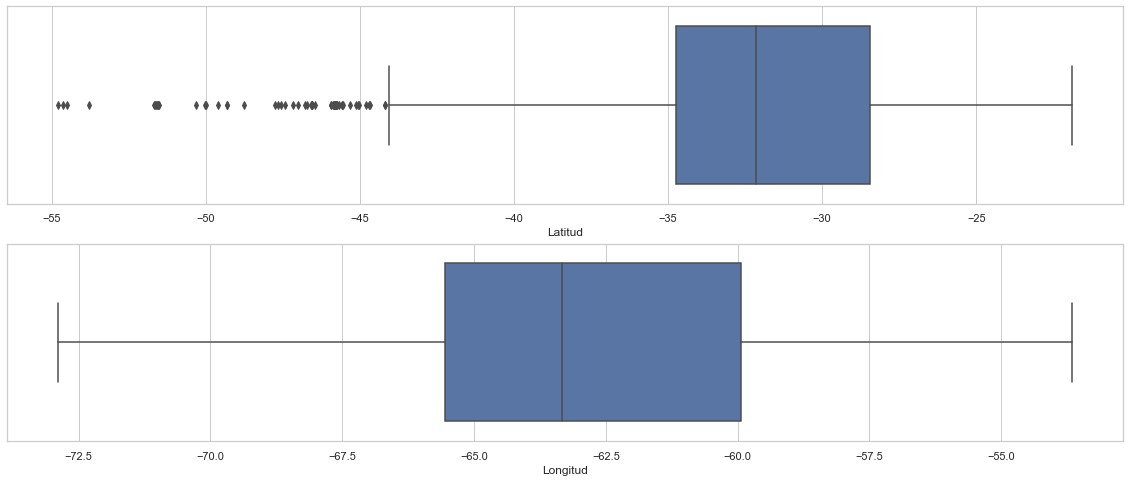

In [82]:
fig, axes = plt.subplots(2,1, figsize=(20,8))
sns.boxplot(x=localidad['Latitud'], ax=axes[0])
sns.boxplot(x=localidad['Longitud'], ax=axes[1])

In [83]:
fig = px.scatter_mapbox(localidad, lat="Latitud", lon="Longitud", hover_name="Provincia", hover_data=["Provincia", "Localidad"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## **Tabla:** Sucursal

In [84]:
sucursal = pd.read_csv('Datasets/Sucursales.csv',delimiter = ';', encoding = "latin-1")
sucursal

,ï»¿ID,Sucursal,Direccion,Localidad,Provincia,Latitud,Longitud
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,"-34,5678060","-58,4495720"
1,2,Palermo 1,Guatemala 5701,CABA,CABA,"-34,5790350","-58,4335660"
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,CABA,C deBuenos Aires,"-34,5959660","-58,4051500"
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As,"-34,6046850","-58,3987640"
4,5,Almagro,Venezuela 3650,Capital,Bs.As.,"-34,6173080","-58,4161790"
5,6,Caballito,Av. Rivadavia 4708,Capital Federal,Ciudad de Buenos Aires,"-34,6163030","-58,4318490"
6,7,Flores,Av. Rivadavia 5746,CapFed,Buenos Aires,"-34,6228680","-58,4464490"
7,8,Alberdi,Av. Juan Bautista Alberdi 1634,Cap. Fed.,Buenos Aires,"-34,6273060","-58,4514980"
8,9,Deposito,Pedernera 530,Cap. Federal,Buenos Aires,"-34,6351340","-58,4615130"
9,10,Velez,Av. Juan Bautista Justo 7738,Cdad de Buenos Aires,Ciudad de Buenos Aires,"-34,6312570","-58,4980630"


In [85]:
sucursal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ï»¿ID      31 non-null     int64 
 1   Sucursal   31 non-null     object
 2   Direccion  31 non-null     object
 3   Localidad  31 non-null     object
 4   Provincia  31 non-null     object
 5   Latitud    31 non-null     object
 6   Longitud   31 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


Normalizar columnas y tipos de datos

In [86]:
sucursal.rename(columns = {'ï»¿ID':'IdSucursal', 'Direccion':'Domicilio'}, inplace = True) # Correción del nombre de la columna 'ID'
sucursal['Latitud'] = sucursal['Latitud'].str.replace(",",".").astype("float") # Reemplazo de caracter en 'Longitud' y 'Latitud' y tipo de dato
sucursal['Longitud'] = sucursal['Longitud'].str.replace(",",".").astype("float")

In [87]:
# Normalización de valores en campo 'Sucursal'
sucursal['Sucursal']=[str(x).replace('Ã³','ó') for x in sucursal['Sucursal']]
sucursal['Sucursal']=[str(x).replace('Ã¡','á') for x in sucursal['Sucursal']]

# Normalización de valores en campo 'Localidad'
sucursal['Localidad']=[str(x).replace('Ã³','ó') for x in sucursal['Localidad']]
sucursal['Localidad']=[str(x).replace('Ã','í') for x in sucursal['Localidad']]
sucursal['Localidad']=[str(x).replace('Tucumí¡n','Tucumán') for x in sucursal['Localidad']]

# Normalización de valores en campo 'Provincia'
sucursal['Provincia']=[str(x).replace('Ã³','ó') for x in sucursal['Provincia']]
sucursal['Provincia']=[str(x).replace('Ã­','í') for x in sucursal['Provincia']]
sucursal['Provincia']=[str(x).replace('TucumÃ¡n','Tucumán') for x in sucursal['Provincia']]

Revisar si existen duplicados

In [88]:
sucursal[sucursal.duplicated()]

,IdSucursal,Sucursal,Domicilio,Localidad,Provincia,Latitud,Longitud


Observar cantidad de datos nulos

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



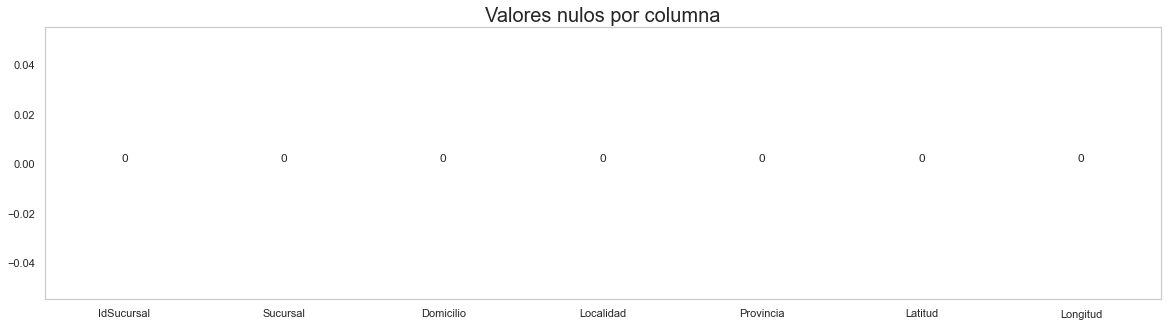

In [89]:
graficar_valores_nulos(sucursal)

### Valores atípicos 

<AxesSubplot:xlabel='Longitud'>

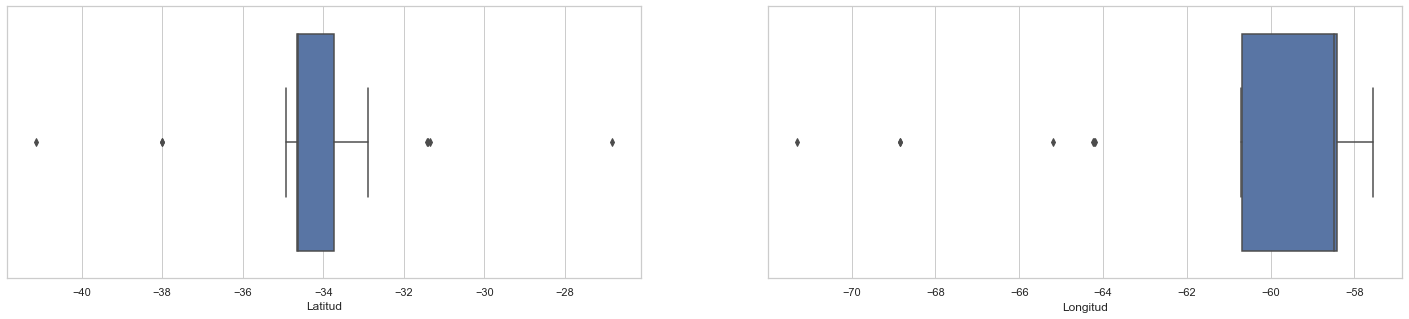

In [90]:
fig, axes = plt.subplots(1,2, figsize=(25,5))
sns.boxplot(x=sucursal['Latitud'], ax=axes[0])
sns.boxplot(x=sucursal['Longitud'], ax=axes[1])

In [91]:
fig = px.scatter_mapbox(sucursal, lat="Latitud", lon="Longitud", hover_name="Provincia", hover_data=["Provincia", "Localidad"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Normalización de datos

In [92]:
df_normalizar = sucursal[['Localidad', 'Provincia']].drop_duplicates()
df_normalizar = normalizacion_geografica(df_normalizar, 'Localidad', 'Provincia')
df_normalizar.head()

Completado: 100.0%


,Localidad,Provincia,Localidad_Normalizada,Localidad_Ind,Provincia_Normalizada,Provincia_Ind,id
0,Ciudad de Buenos Aires,Ciudad de Buenos Aires,CIUDAD DE BUENOS AIRES,1.000000,Buenos Aires,0.705882,2000010000
1,CABA,CABA,Cabalango,0.615385,Córdoba,0.545455,14091030000
2,CABA,C deBuenos Aires,Casbas,0.800000,Buenos Aires,0.857143,6399020000
3,Ciudad de Buenos Aires,Bs As,CIUDAD DE BUENOS AIRES,1.000000,Buenos Aires,0.588235,2000010000
4,Capital,Bs.As.,TAPIALES,0.666667,Buenos Aires,0.421053,6427010011


In [93]:
sucursal = pd.merge(sucursal, df_normalizar, on=['Localidad', 'Provincia'], how='left')
sucursal

,IdSucursal,Sucursal,Domicilio,Localidad,Provincia,Latitud,Longitud,Localidad_Normalizada,Localidad_Ind,Provincia_Normalizada,Provincia_Ind,id
0,1,Cabildo,Av. Cabildo 1342,Ciudad de Buenos Aires,Ciudad de Buenos Aires,-34.567806,-58.449572,CIUDAD DE BUENOS AIRES,1.000000,Buenos Aires,0.705882,2000010000
1,2,Palermo 1,Guatemala 5701,CABA,CABA,-34.579035,-58.433566,Cabalango,0.615385,Córdoba,0.545455,14091030000
2,3,Palermo 2,Gral. Lucio Norberto Mansilla 2668,CABA,C deBuenos Aires,-34.595966,-58.405150,Casbas,0.800000,Buenos Aires,0.857143,6399020000
3,4,Corrientes,Av. Corrientes 2352,Ciudad de Buenos Aires,Bs As,-34.604685,-58.398764,CIUDAD DE BUENOS AIRES,1.000000,Buenos Aires,0.588235,2000010000
4,5,Almagro,Venezuela 3650,Capital,Bs.As.,-34.617308,-58.416179,TAPIALES,0.666667,Buenos Aires,0.421053,6427010011
5,6,Caballito,Av. Rivadavia 4708,Capital Federal,Ciudad de Buenos Aires,-34.616303,-58.431849,Capital Federal,1.000000,Buenos Aires,0.705882,2000010000
6,7,Flores,Av. Rivadavia 5746,CapFed,Buenos Aires,-34.622868,-58.446449,CLAYPOLE,0.571429,Buenos Aires,1.000000,6028010003
7,8,Alberdi,Av. Juan Bautista Alberdi 1634,Cap. Fed.,Buenos Aires,-34.627306,-58.451498,Capital Federal,0.583333,Buenos Aires,1.000000,2000010000
8,9,Deposito,Pedernera 530,Cap. Federal,Buenos Aires,-34.635134,-58.461513,Capital Federal,0.758621,Buenos Aires,1.000000,2000010000
9,10,Velez,Av. Juan Bautista Justo 7738,Cdad de Buenos Aires,Ciudad de Buenos Aires,-34.631257,-58.498063,CIUDAD DE BUENOS AIRES,0.952381,Buenos Aires,0.705882,2000010000


## Ventas por sucursal

Text(0.5, 1.0, 'Ventas por Sucursal')

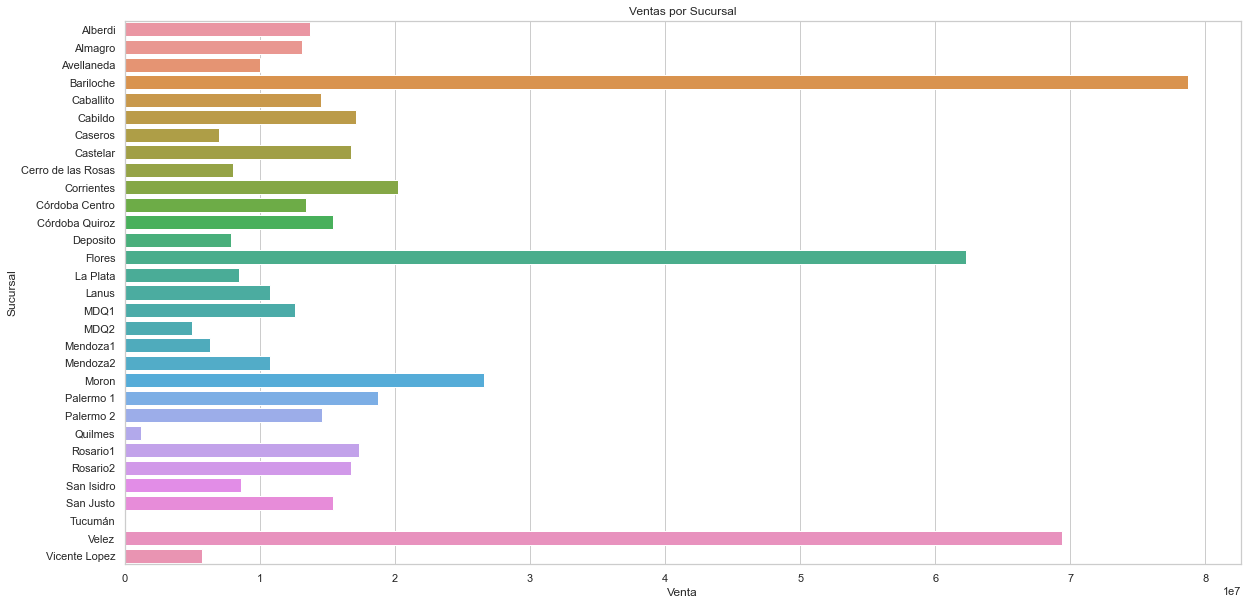

In [94]:
sucursal_ = pd.merge(sucursal, venta, how='left', on=['IdSucursal'])
sucursal_.sort_values(by=['IdVenta'], inplace=True)

plt.figure(figsize=(20,10))
data = sucursal_.groupby(['Sucursal']).sum()
sns.barplot(data=data, y=data.index, x="Venta").set_title('Ventas por Sucursal')

Mayores ventas por Fecha y Sucursal

In [95]:
venta_sucursal = venta.groupby(['IdSucursal', venta.Fecha.dt.year])['Fecha', 'Venta'].sum()
venta_sucursal.sort_values(by=('Venta'), ascending=False, inplace=True)
venta_sucursal.reset_index(inplace=True)
venta_sucursal.head(10)

/var/folders/5w/5qvg4ht11gqbxjjz9hc2zbs80000gn/T/ipykernel_21578/882027650.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,IdSucursal,Fecha,Venta
0,31,2018,74792861.60
1,10,2015,57248285.31
2,7,2020,37916949.53
3,14,2020,20999248.83
4,5,2018,7787551.64
5,7,2015,6191986.54
6,7,2019,5943703.36
7,6,2017,5785760.12
8,4,2018,5774109.94
9,15,2016,5634933.56


### Guardar dataset final 

In [97]:
cliente.to_csv('Datasets_Procesado/Cliente.csv', index=False)
proveedor.to_csv('Datasets_Procesado/Proveedor.csv', index=False)
localidad.to_csv('Datasets_Procesado/Localidad.csv', index=False)
sucursal.to_csv('Datasets_Procesado/Sucursal.csv', index=False)